# Explore here

In [4]:
import pandas as pd

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas y la información del conjunto de datos
df.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [5]:
# Mostrar los nombres de las columnas
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [6]:
def separar_columnas(df):
    categoricas = []
    numericas = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')
separar_columnas(df)

Categóricas: ['COUNTY_NAME', 'STATE_NAME']
Númericas: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's 

La variable objetivo es 'Obesity_prevalence'

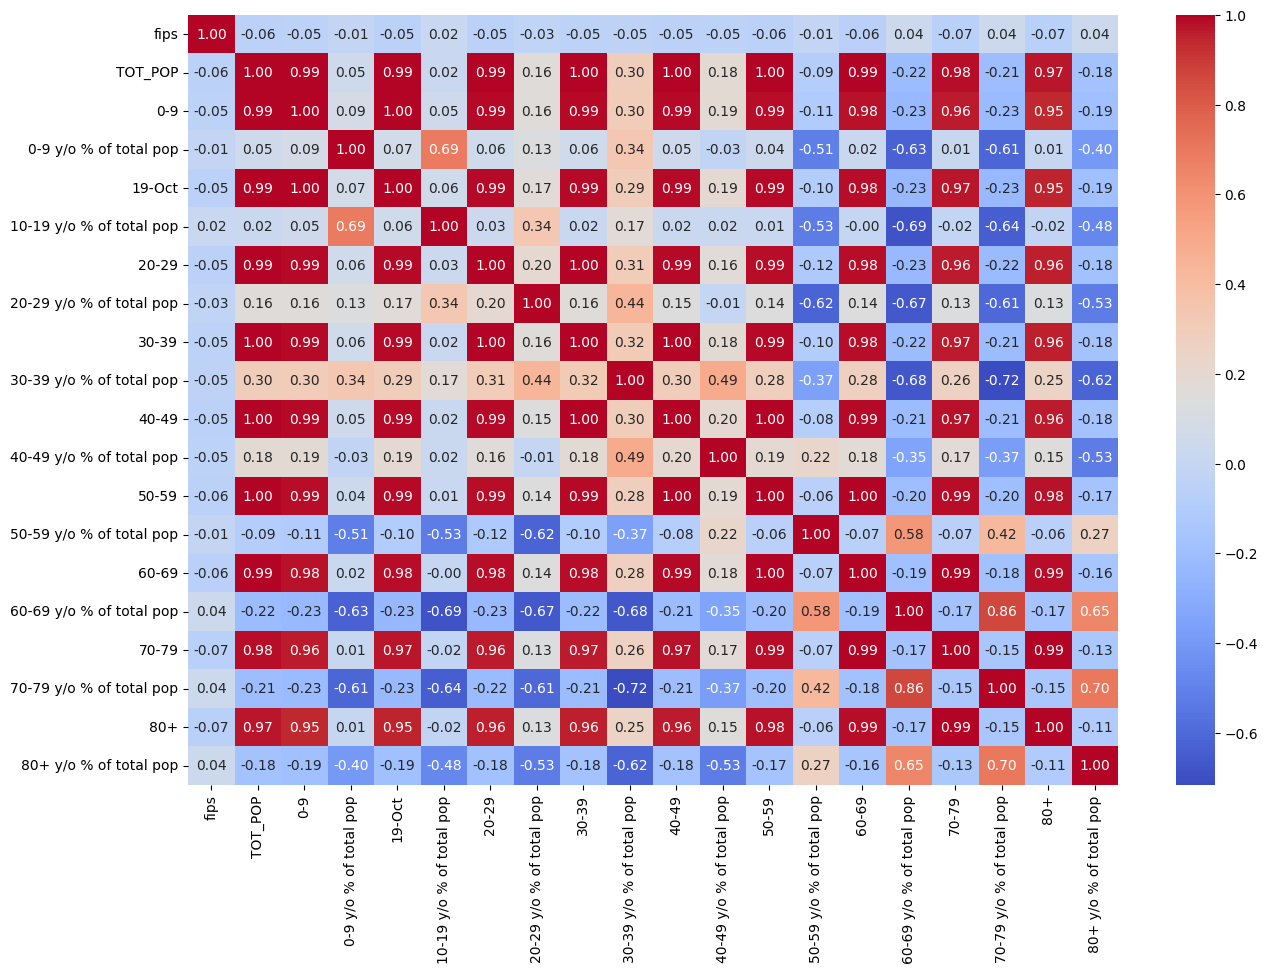

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas relevantes
selected_columns = [
    'fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
]

# Crear un nuevo DataFrame con las columnas seleccionadas
data_selected = data[selected_columns]

# Crear la tabla de correlación
correlation_matrix = data_selected.corr()

# Mostrar la tabla de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [7]:
df['COUNTY_NAME'] = pd.factorize(df['COUNTY_NAME'])[0]
df['STATE_NAME'] = pd.factorize(df['STATE_NAME'])[0]

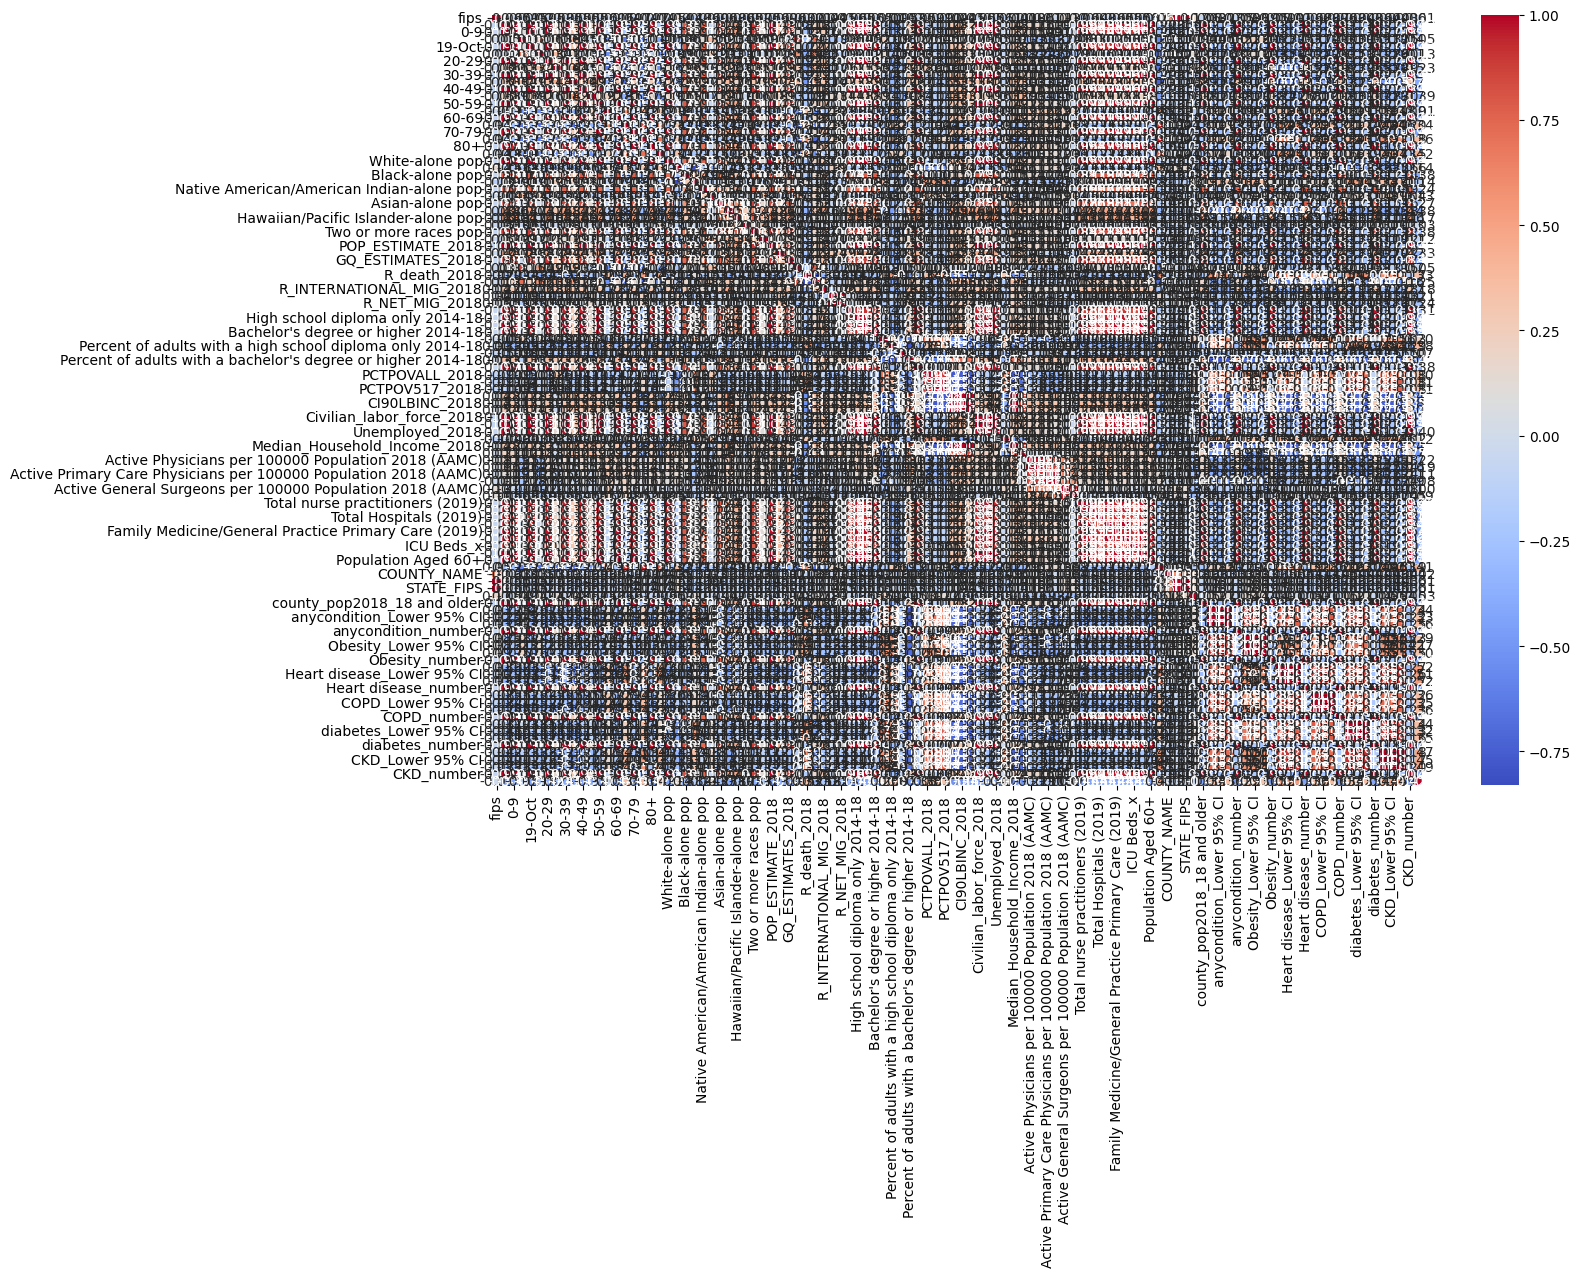

fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19 y/o % of total pop     20-29  \
fips                   -0.053130                  0.018994 -0.053591   
TOT_POP                 0.994596                  0.023384  0.994558   
0-9                     0.997487                  0.048341  0.989992   
0-9 y/o % of total pop  0.074714                  0.687844  0.056047   
19-Oct                  1.000000                  0.056762  0.988552   
...                          ...                       ...       ...   
CKD_prevalence         -0.226956                 -0.276999 -0.219593   
CKD_Lower 95% CI       -0.210885                 -0.259547 -0.203506   
CKD_Upper 95% CI       -0.239865                 -0.296576 -0.232199   
CKD_number              0.985221                  0.007654  0.986895   
Urban_rural_code       -0.431290                 -0.129469 -0.412556   

                        20-29 y/o % of total pop     30-39  \
fips                                   -0.030310 -0.051715   
TOT_POP                                 0.160254  0.995526   
0-9                                     0.161984  0.990971   
0-9 y/o % of total pop                  0.130136  0.058535   
19-Oct                                  0.167605  0.987298   
...                                          ...       ...   
CKD_prevalence                         -0.366835 -0.215739   
CKD_Lower 95% CI                       -0.341480 -0.199999   
CKD_Upper 95% CI                       -0.393541 -0.228048   
CKD_number                              0.149367  0.985851   
Urban_rural_code                       -0.231932 -0.414211   

                        30-39 y/o % of total pop  ...  COPD_number  \
fips                                   -0.045491  ...    -0.063463   
TOT_POP                                 0.295635  ...     0.981495   
0-9                                     0.304263  ...     0.972641   
0-9 y/o % of total pop                  0.342930  ...     0.034582   
19-Oct                                  0.294682  ...     0.973427   
...                                          ...  ...          ...   
CKD_prevalence                         -0.478115  ...    -0.191943   
CKD_Lower 95% CI                       -0.450913  ...    -0.176039   
CKD_Upper 95% CI                       -0.506720  ...    -0.204368   
CKD_number                              0.271343  ...     0.991025   
Urban_rural_code                       -0.404748  ...    -0.448835   

                        diabetes_prevalence  diabetes_Lower 95% CI  \
fips                              -0.031057              -0.036327   
TOT_POP                           -0.174843              -0.160621   
0-9                               -0.167495              -0.152687   
0-9 y/o % of total pop            -0.028295              -0.005923   
19-Oct                            -0.178421              -0.163623   
...                                     ...                    ...   
CKD_prevalence                     0.918514               0.908023   
CKD_Lower 95% CI                   0.924630             

In [30]:
# Mostrar la tabla de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
df.corr()


df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]
hacer una lista vacía y hacer un for para evaluar la condicion y hacarle un append

In [40]:
import pandas as pd
max_number_of_nas = 1000
df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]


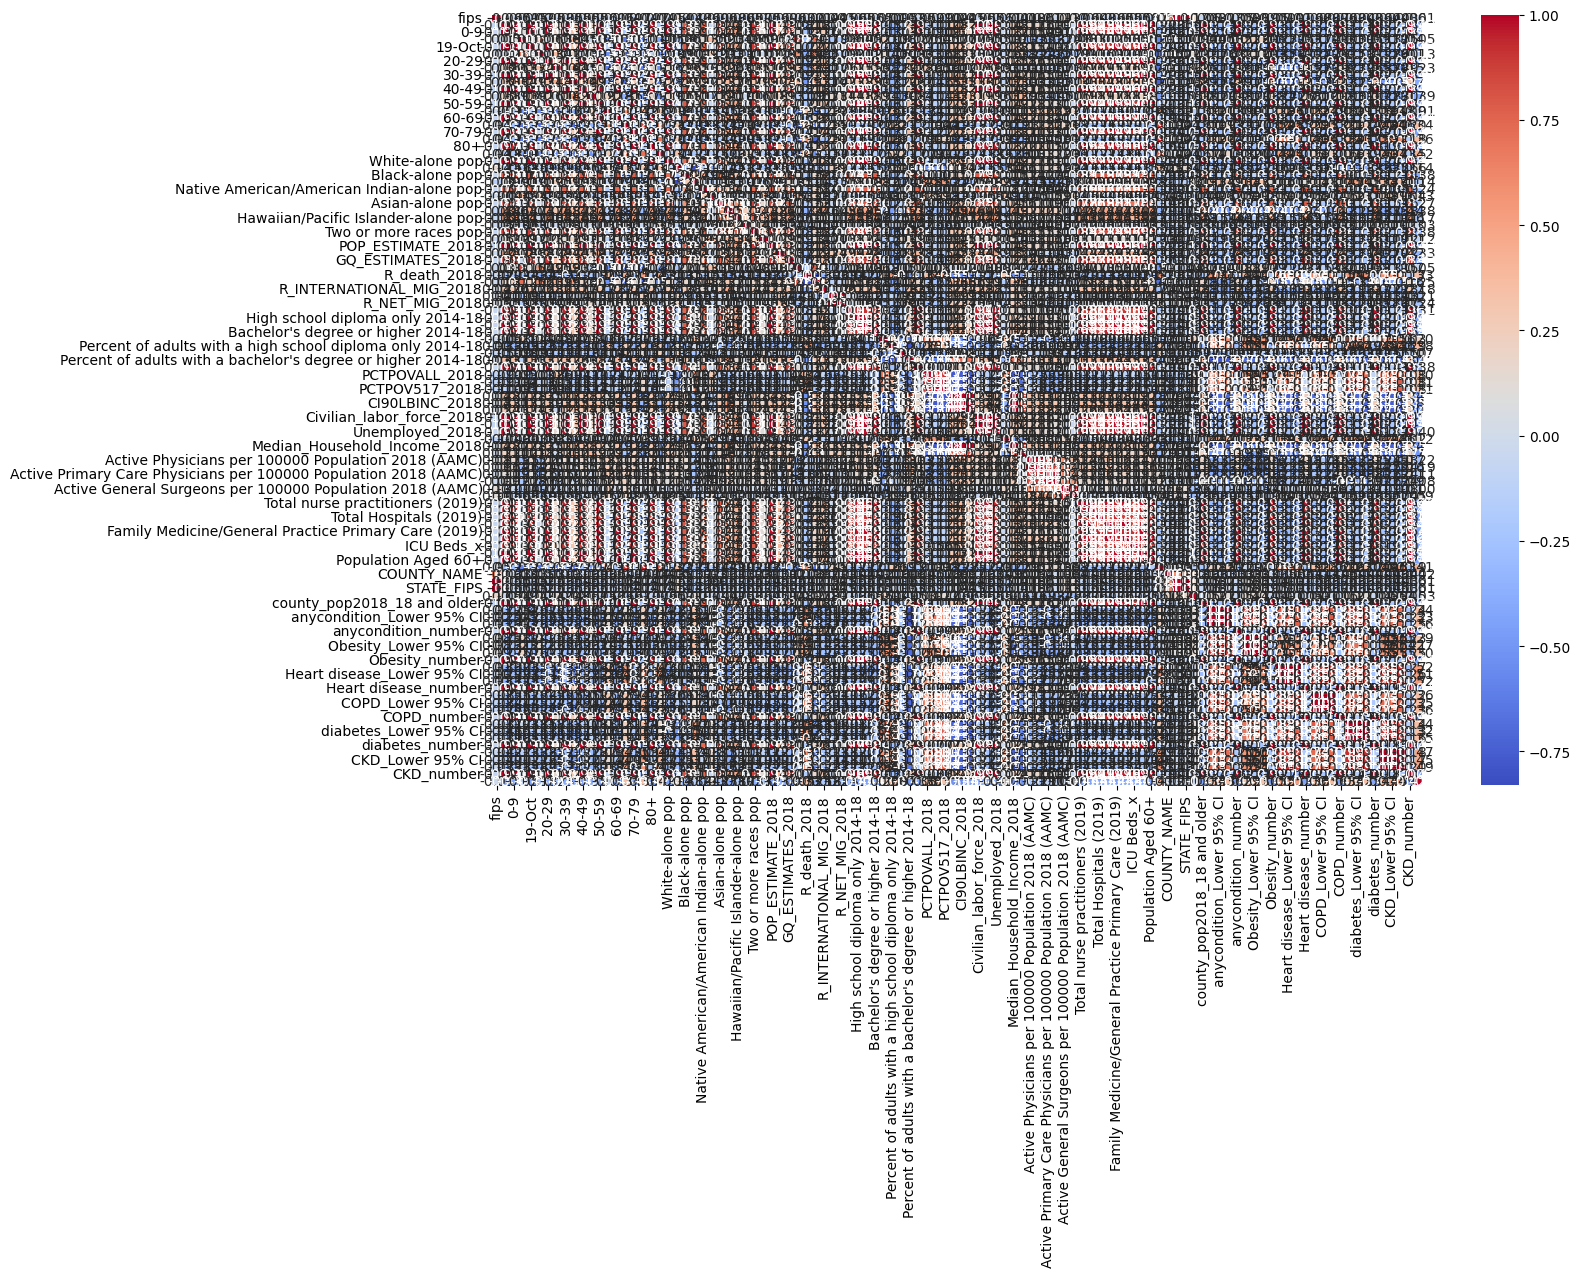

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()